# Brute Force Linear Regression
This notebook finds the best line using brute force optimisation.

## Intro / explanation:
This script finds a line of best fit of the form y = mx + b for a set of (x, y) coordinates that you enter.

## Instructions:
1. When prompted, enter your coordinates as a comma-separated list of numbers.
2. Every 2 numbers represent one (x, y) pair.

## The script will:
 - Try all possible m and b in the range [-100, 100] in steps of 0.1
 - For each (m, b), calculate the total squared vertical distance
 - Identify the best (m, b)
 - Plot the points and the resulting best-fit line

In [4]:
import matplotlib.pyplot as plt

In [12]:
# --- INPUT ---
raw_input = input("Enter your coordinates here: ")

Enter your coordinates here:  1,8,3,54,4,54,2,67,1,9


In [13]:
# --- Parse the input into (x, y) pairs ---
parts = [p.strip() for p in raw_input.split(",") if p.strip() != ""]

if len(parts) < 2 or len(parts) % 2 != 0:
    raise ValueError("You must enter an even number of numeric values (x1,y1,x2,y2,...)")

values = []
for p in parts:
    try:
        values.append(float(p))
    except ValueError:
        raise ValueError(f"Could not convert '{p}' to a number.")

points = []
for i in range(0, len(values), 2):
    points.append((values[i], values[i+1]))

print(f"Parsed {len(points)} points:")
for x, y in points:
    print(f"  ({x}, {y})")

Parsed 5 points:
  (1.0, 8.0)
  (3.0, 54.0)
  (4.0, 54.0)
  (2.0, 67.0)
  (1.0, 9.0)


In [14]:
# --- BRUTE FORCE SEARCH FOR BEST m AND b ---
best_m = None
best_b = None
best_error = None

for m_int in range(-1000, 1001):
    m = m_int / 10.0
    for b_int in range(-1000, 1001):
        b = b_int / 10.0

        total_error = 0.0
        for (x, y) in points:
            y_pred = m * x + b
            diff = y - y_pred
            total_error += diff * diff

        if best_error is None or total_error < best_error:
            best_error = total_error
            best_m = m
            best_b = b

best_m_rounded = round(best_m, 1)
best_b_rounded = round(best_b, 1)

print("\nBest line of best fit (brute force search):")
print(f"y = {best_m_rounded:.1f}x + {best_b_rounded:.1f}")
print(f"(Total squared error: {best_error:.3f})")


Best line of best fit (brute force search):
y = 15.7x + 3.9
(Total squared error: 1422.100)


In [15]:
# --- PLOT ---
# Extract x and y lists from points
xs = [p[0] for p in points]
ys = [p[1] for p in points]

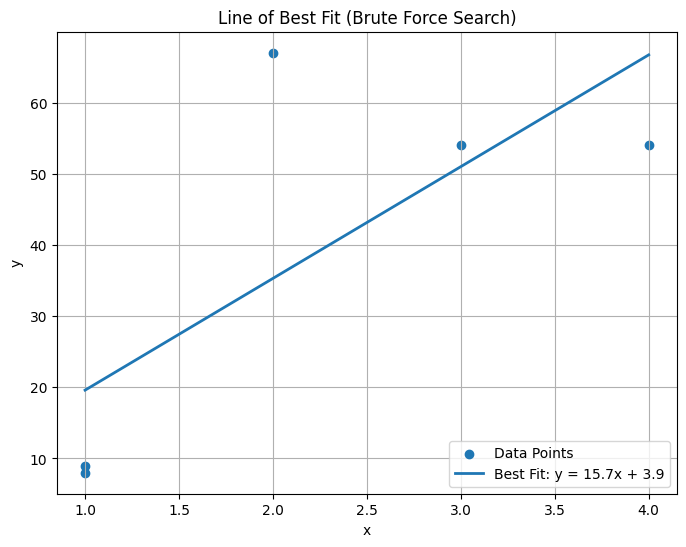

In [16]:
# Create line values spanning the x-range
x_min, x_max = min(xs), max(xs)
line_x = [x_min, x_max]
line_y = [best_m * x + best_b for x in line_x]

plt.figure(figsize=(8, 6))
plt.scatter(xs, ys, label="Data Points")
plt.plot(line_x, line_y, label=f"Best Fit: y = {best_m_rounded}x + {best_b_rounded}", linewidth=2)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Line of Best Fit (Brute Force Search)")
plt.legend()
plt.grid(True)

plt.show()